In [1]:
# import pandas as pd
import sys
import os.path
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from spykshrk.realtime.datatypes import Datatypes

# import bokeh.plotting
# from bokeh.plotting import figure, output_notebook, show, gridplot, reset_output
# output_notebook()

#pd.set_option('float_format', '{:,.1f}'.format)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

matplotlib.rcParams.update({'font.size': 28})

In [2]:
#load results hdf5 file and config file
config_file = '/home/mcoulter/spykshrk_realtime/config/test_single_MEC.json'

config = json.load(open(config_file, 'r'))

hdf_file = '/mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged_greenflash.h5'

store = pd.HDFStore(hdf_file, mode='r')
timing = store['rec_100']

In [3]:
#show dataframe
timing

,rec_ind,timestamp,elec_grp_id,rank,label,datatype,wtime_raw,wtime_adj
0,0,39648560,24,0,stim_rip_state,1,1.562974e+09,1.562974e+09
1,3,39648560,26,2,rip_recv,1,1.562974e+09,1.562974e+09
2,5,39648560,26,2,rip_send,1,1.562974e+09,1.562974e+09
3,6,39648560,30,2,rip_recv,1,1.562974e+09,1.562974e+09
4,8,39648560,30,2,rip_send,1,1.562974e+09,1.562974e+09
...,...,...,...,...,...,...,...,...
1861271,588005,43355280,26,0,stim_rip_state,1,1.562974e+09,1.562974e+09
1861272,588006,43355280,30,0,stim_rip_state,1,1.562974e+09,1.562974e+09
1861273,588007,43355300,24,0,stim_rip_state,1,1.562974e+09,1.562974e+09
1861274,588008,43355300,26,0,stim_rip_state,1,1.562974e+09,1.562974e+09


In [4]:
# pull out the timing messages labeled "enc_recv" - this the time when spykshrk decodes the incoming spike
#   the first action spykshrk does with the spike

#note: wtime is in seconds, so need to convert timestamp into seconds
# this is for every spike - before any amplitude filtering
receive_encoding_spike = timing[timing['label']=='enc_recv']
# set the tetrode you want to look at - this hdf5 file has tets 24, 26, and 30
tet_times = receive_encoding_spike[receive_encoding_spike['elec_grp_id']==26]
tet_times['timing_diff'] = tet_times['wtime_adj'] - tet_times['timestamp']/30000
# there is a big offset between the trodes timestamp in seconds and the adj wall time, so subtract off that offset
#    so that the timing difference is 0 for one of the first few hundred spikes
#    this is not just the first spike, becuase then the timing difference was negative for many spike
tet_times['timing_zeroed'] = tet_times['timing_diff']-1.562972546641213e+09
# set window for average latency
tet_times['timing_delay_avg'] = tet_times['timing_zeroed'].rolling(window=1000).mean()
tet_times

/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,rec_ind,timestamp,elec_grp_id,rank,label,datatype,wtime_raw,wtime_adj,timing_diff,timing_zeroed,timing_delay_avg
747,0,39650212,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.032194,NaN
796,1,39650312,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.028972,NaN
818,2,39650360,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.027441,NaN
877,3,39650461,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.024138,NaN
914,7,39650536,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.022240,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1860376,55843,43352388,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.005100,0.006376
1860395,55844,43352432,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.003700,0.006376
1860468,55845,43352597,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.009685,0.006382
1860505,55846,43352676,26,4,enc_recv,2,1.562974e+09,1.562974e+09,1.562973e+09,0.007147,0.006388


(0, 30)

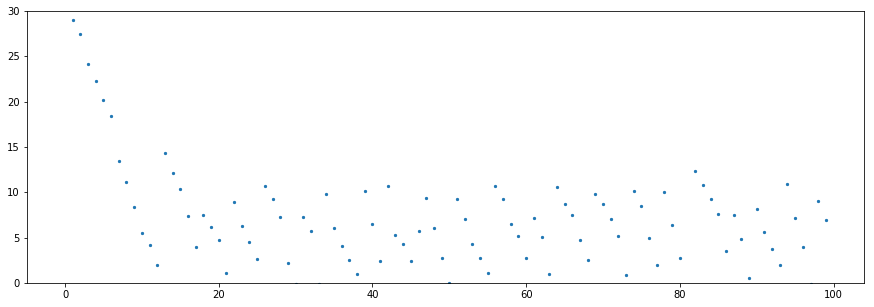

In [5]:
# plot latency of a few spikes early on to check time offset is working - in msec
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,100,1),tet_times['timing_zeroed'][0:100]*1000,s=5)
plt.ylim([0,30])

(0, 30)

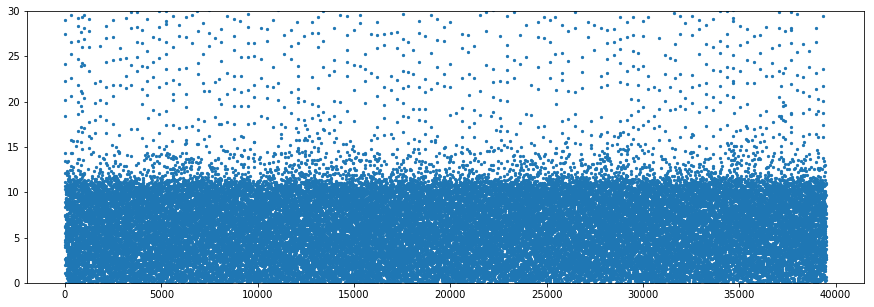

In [6]:
# plot latency for all spikes - in msec
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,39497,1),tet_times['timing_zeroed']*1000,s=5)
plt.ylim([0,30])

(0, 10)

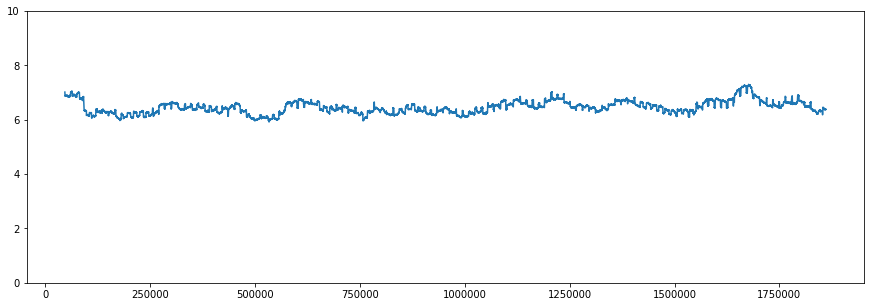

In [8]:
# plot average latency for all spikes (averaged over 1000 spikes) - in msec
plt.figure(figsize=(15,5))
plt.plot(tet_times['timing_delay_avg']*1000)
plt.ylim([0,10])

(array([6.78272083e-02, 7.68794326e-02, 8.17279175e-02, 8.44616377e-02,
        8.55705996e-02, 8.68343005e-02, 8.78916828e-02, 8.71953578e-02,
        9.05480335e-02, 8.75306254e-02, 8.10573823e-02, 3.15667311e-02,
        1.03932946e-02, 7.24693746e-03, 4.66795616e-03, 2.47582205e-03,
        1.85686654e-03, 1.52159897e-03, 1.36686009e-03, 1.05738233e-03,
        9.54223082e-04, 1.47001934e-03, 1.26370084e-03, 1.23791103e-03,
        9.80012895e-04, 8.51063830e-04, 1.10896196e-03, 1.21212121e-03,
        1.16054159e-03, 1.16054159e-03, 9.80012895e-04, 1.08317215e-03,
        1.13475177e-03, 8.25274017e-04, 7.73694391e-04, 9.28433269e-04,
        5.67375887e-04, 8.51063830e-04, 5.15796260e-04, 3.61057382e-04,
        3.61057382e-04, 1.54738878e-04, 1.80528691e-04, 1.03159252e-04,
        0.00000000e+00, 7.73694391e-05, 0.00000000e+00, 0.00000000e+00,
        2.57898130e-05]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23

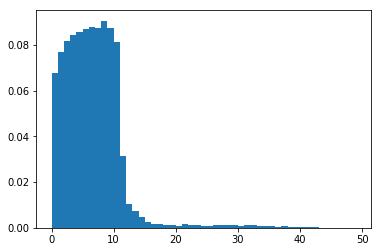

In [9]:
# plot histogram of latency times - in msec
plt.hist(tet_times['timing_zeroed']*1000, bins=np.arange(0,50,1), density=True)